<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/QC%20-%20Part%20-%20A%20-%20Live%20Session/Live_Session_05_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Lecture - 05</font>

## Install Package

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=901566a8ce1f14bc03ebd8410dd1e917cf390a88033f27b9323be80bc9820dc0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts

import random

## Quantum State Teleportation

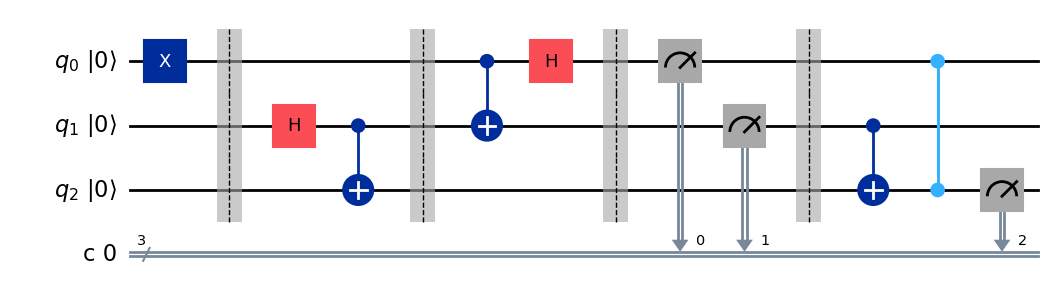

In [4]:
qc = QuantumCircuit(3, 3)

# Step-1
qc.x(0)
qc.barrier()

# Step-2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step-3
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step-4
qc.measure([0, 1], [0, 1])
qc.barrier()

# Step-5
qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 2)

qc.draw(initial_state=True, output='mpl')

In [5]:
circuit = transpile(qc, AerSimulator())
result = AerSimulator().run(circuit, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)

{'101': 245, '110': 255, '111': 253, '100': 247}


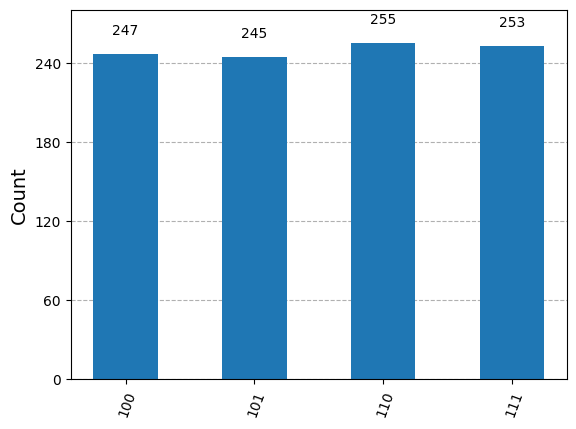

In [6]:
plot_histogram(counts)

## Superdense Coding: Transports classical bits 10

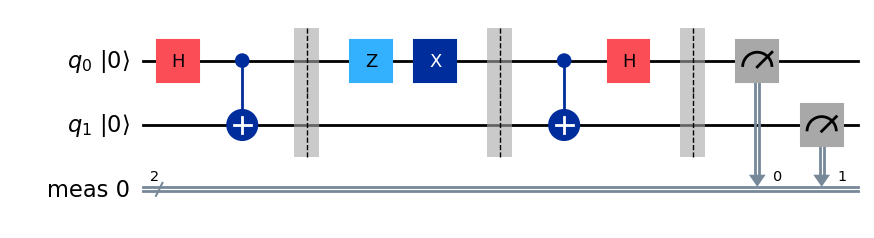

In [7]:
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()

c = "1"
d = "1"

if d == "1":
  circuit.z(0)
if c == "1":
  circuit.x(0)
circuit.barrier()

circuit.cx(0, 1)
circuit.h(0)

circuit.measure_all()

circuit.draw(initial_state=True, output='mpl')

In [8]:
circuit = transpile(circuit, AerSimulator())
result = AerSimulator().run(circuit, shots=1000).result()
counts = result.get_counts(circuit)
print(counts)

{'11': 1000}


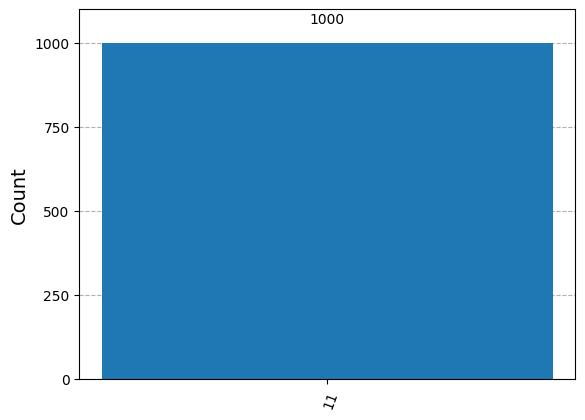

In [9]:
plot_histogram(counts)

## QKD BB84 Protocol

### Encoding

#### Z Basis

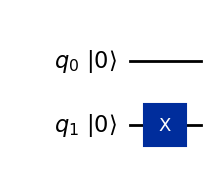

In [10]:
circuit = QuantumCircuit(2)

circuit.x(1)

circuit.draw(initial_state=True, output='mpl')

In [11]:
simulator = AerSimulator(method='statevector')

circuit.save_statevector()
job = simulator.run(circuit)
job_monitor(job)

result = job.result()

Job Status: job has successfully run


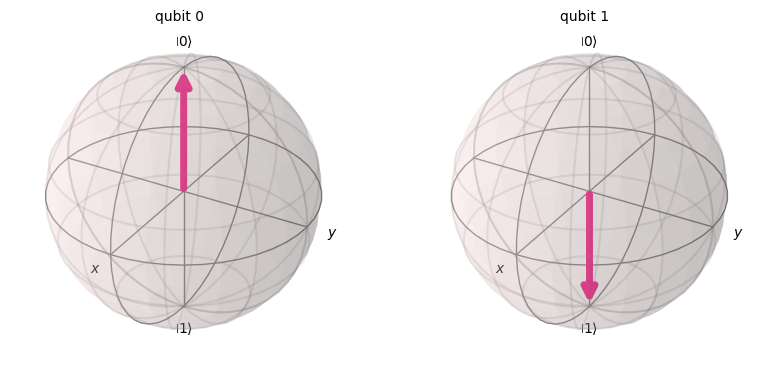

In [12]:
state_vector = result.get_statevector()
plot_bloch_multivector(state_vector)

#### X Basis

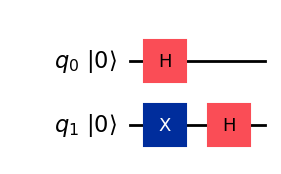

In [13]:
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.x(1)
circuit.h(1)

circuit.draw(initial_state=True, output='mpl')

In [14]:
simulator = AerSimulator(method='statevector')

circuit.save_statevector()
job = simulator.run(circuit)
job_monitor(job)

result = job.result()

Job Status: job has successfully run


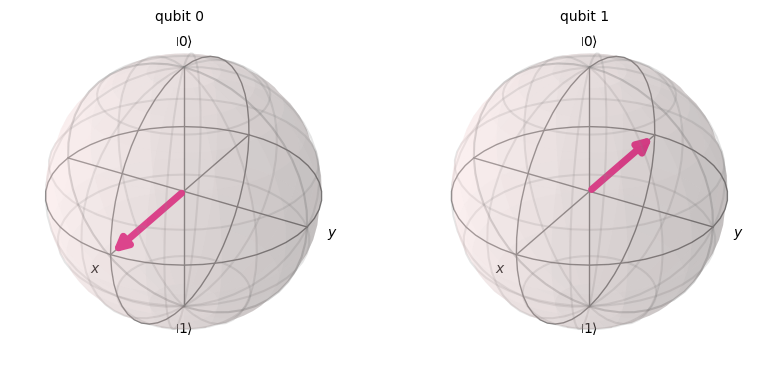

In [15]:
state_vector = result.get_statevector()
plot_bloch_multivector(state_vector)

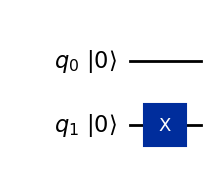

In [16]:
circuit = QuantumCircuit(2)

circuit.x(1)

circuit.draw(initial_state=True, output='mpl')

In [17]:
simulator = AerSimulator(method='statevector')

circuit.save_statevector()
job = simulator.run(circuit)
job_monitor(job)

result = job.result()

Job Status: job has successfully run


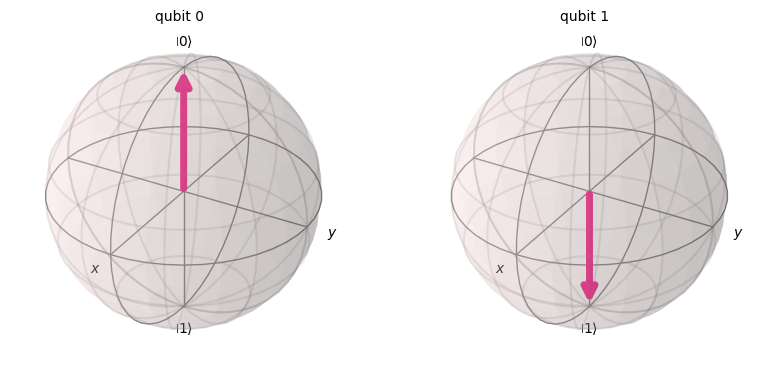

In [18]:
state_vector = result.get_statevector()
plot_bloch_multivector(state_vector)

## Main Implementation

### Phase 1 - Preparing & Sending

#### Step-1

In [19]:
KEY_LENGTH = 500
random.seed(0)

In [20]:
alice_bits = ""
for i in range(KEY_LENGTH):
  randBit = random.randint(0, 1)
  alice_bits += str(randBit)

print("The bits Alice is going to send are: " + alice_bits[:10] + "...")

The bits Alice is going to send are: 1101111110...


#### Step-2

In [21]:
def generate_random_bases(num_of_bases):
  bases_string = ""
  for i in range(num_of_bases):
    randBasis = random.randint(0, 1)
    if randBasis == 0:
      bases_string += "Z"
    else:
      bases_string += "X"
  return bases_string

In [22]:
alice_bases = generate_random_bases(KEY_LENGTH)

print("The bases Alice is going to encode them in are: " + alice_bases[:10] + "....")

The bases Alice is going to encode them in are: ZXXZZZZXZX....


#### Step-3

In [23]:
def encode(bits, bases):
  encoded_qubits = []

  for bit, basis in zip(bits, bases):
    qc = QuantumCircuit(1, 1)

    if bit == "0" and basis == "Z":
      encoded_qubits.append(qc)
    elif bit == "1" and basis == "Z":
      qc.x(0)
      encoded_qubits.append(qc)
    elif bit == "0" and basis == "X":
      qc.h(0)
      encoded_qubits.append(qc)
    elif bit == "1" and basis == "X":
      qc.x(0)
      qc.h(0)
      encoded_qubits.append(qc)

  return encoded_qubits

In [24]:
encoded_qubits = encode(alice_bits, alice_bases)

for i in range(5):
  print(encoded_qubits[i])

print("etc...")

     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
etc...


#### Step-4

In [25]:
QUANTUM_CHANNEL = encoded_qubits

### Phase 2: Received & Measurement

#### Step-5

In [26]:
qubits_received = QUANTUM_CHANNEL

In [27]:
bob_bases = generate_random_bases(KEY_LENGTH)

print("The bases Bob is going to decode them in are: " + bob_bases[:10] + "....")

The bases Bob is going to decode them in are: XZZXZZZXXX....


#### Step-6

In [28]:
def measure(qubits, bases):
  bits = ""
  for qubit, basis in zip(qubits, bases):
    if basis == "Z":
      qubit.measure(0, 0)
    elif basis == "X":
      qubit.h(0)
      qubit.measure(0, 0)

    #Execute on simulator
    simulator = AerSimulator()

    #qubit.save_statevector()
    #job = simulator.run(qubit, shots=1)
    #job_monitor(job)

    #result = job.result()
    result = simulator.run(qubit, shots=1).result()
    counts = result.get_counts()
    measured_bit = max(counts, key=counts.get)

    bits += measured_bit

  return bits

#### Step-7

In [29]:
bob_bits = measure(qubits_received, bob_bases)

print("The bits Bob received are: " + bob_bits[:10] + "...")

The bits Bob received are: 0010111100...


### Phase 3: Comparing

#### Step-8

In [30]:
CLASSICAL_CHANNEL = alice_bases

In [31]:
common_bases = [i for i in range(KEY_LENGTH) if CLASSICAL_CHANNEL[i] == bob_bases[i]]

print("The indices of the first 10 bases they share in common are: " + str(common_bases[:10]))

The indices of the first 10 bases they share in common are: [4, 5, 6, 7, 9, 10, 11, 19, 22, 24]


In [32]:
bob_bits = [bob_bits[index] for index in common_bases]

In [33]:
CLASSICAL_CHANNEL = common_bases

In [34]:
alice_bits = [alice_bits[index] for index in common_bases]

In [35]:
CLASSICAL_CHANNEL = alice_bits[:100]

if CLASSICAL_CHANNEL == bob_bits[:100]:
  print("Yep, Alice and Bob seem to have the same bits!")
else:
  print("Uh oh, at least one of the bits is different.")

Yep, Alice and Bob seem to have the same bits!


# <font color="red">Lecture - 06</font>

## Main Implementation

### Phase 3: Comparing

#### Step-9

In [36]:
alice_bits = alice_bits[100:]
bob_bits = bob_bits[100:]

In [37]:
key = ""

for bit in alice_bits:
  key += bit

print("The key is: ")
print(str(key))
print("Don't tell anyone!!")

print("\nThe key is " + str(len(key)) + " bits long.")

The key is: 
010101101001011110110100011011001100000111010101000101011101001000110101100111101001101010000111000111000011001110100100000
Don't tell anyone!!

The key is 123 bits long.


## Interception

### Random Key generation by Alice

In [38]:
alice_bits = ""

for i in range(KEY_LENGTH):
  randBit = random.randint(0, 1)
  alice_bits += str(randBit)

alice_bases = generate_random_bases(KEY_LENGTH)

encoded_qubits = encode(alice_bits, alice_bases)

QUANTUM_CHANNEL = encoded_qubits

### Interception by Eve

In [39]:
qubits_intercepted = QUANTUM_CHANNEL
eve_bases = generate_random_bases(KEY_LENGTH)
eve_bits = measure(qubits_intercepted, eve_bases)

In [40]:
QUANTUM_CHANNEL = encode(eve_bits, eve_bases)

### Random Key genarte and measure by BOB

In [41]:
qubits_received = QUANTUM_CHANNEL
bob_bases = generate_random_bases(KEY_LENGTH)
bob_bits = measure(qubits_received, bob_bases)

### Comparison

In [42]:
CLASSICAL_CHANNEL = alice_bases

In [43]:
common_bases = [i for i in range(KEY_LENGTH) if CLASSICAL_CHANNEL[i] == bob_bases[i]]
bob_bits = [bob_bits[index] for index in common_bases]

In [44]:
CLASSICAL_CHANNEL = common_bases
alice_bits = [alice_bits[index] for index in common_bases]

### Key doesn't match

In [45]:
CLASSICAL_CHANNEL = alice_bits[:100]

if CLASSICAL_CHANNEL == bob_bits[:100]:
  print("Yep, Alice and Bob seem to have the same bits!")
else:
  print("Uh oh, at least one of the bits is different.")

Uh oh, at least one of the bits is different.


# <center><font size="50" color="red">Thank You</font></center>